In [1]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

In [4]:
X.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [5]:
X.shape

(20640, 8)

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [7]:
X.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  
count  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704  
std       10.386050      2.135952      2.003532  
min        0.692308     32.540000   -124.350000  
25%        2.429741     33.930000   -121.800000  
50%        2.818116     34.260000   -118.490000  
75%        3.282261     37.710000   -118.010000  
max     1243.333333     41.950000   -114.310000

In [8]:
X.isna().sum(axis=0)

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [10]:
X_dev, X_valid, y_dev, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

X_dev.shape, X_valid.shape

((16718, 8), (1858, 8))

In [11]:
data_scaler = StandardScaler()
X_dev = data_scaler.fit_transform(X_dev, y_dev)
X_valid = data_scaler.transform(X_valid)
X_test = data_scaler.transform(X_test)

In [12]:
import tensorflow as tf

In [13]:
from tensorflow import keras

model = keras.models.Sequential(
    [
        keras.layers.InputLayer(input_shape=X_dev.shape[1]),
        keras.layers.Dense(30, activation=keras.activations.relu),
        keras.layers.Dense(1),
    ]
)

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


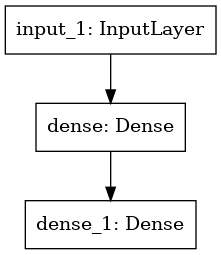

In [15]:
from tensorflow.keras import utils

utils.plot_model(model)

In [16]:
# default loss function for regression seems to be mse
# giving metrics same as mse is not necessary here
model.compile(
    loss=keras.losses.mean_squared_error,
    optimizer=keras.optimizers.SGD(learning_rate=0.01),
)

In [17]:
history = model.fit(X_dev, y_dev, batch_size=32, epochs=50, validation_data=(X_valid, y_valid))

Epoch 1/50
523/523 [==============================] - 5s 10ms/step - loss: 1.3014 - val_loss: 0.5237
Epoch 2/50
523/523 [==============================] - 0s 918us/step - loss: 0.4850 - val_loss: 0.4774
Epoch 3/50
523/523 [==============================] - 0s 889us/step - loss: 0.4421 - val_loss: 0.4627
Epoch 4/50
523/523 [==============================] - 0s 884us/step - loss: 0.4334 - val_loss: 0.4526
Epoch 5/50
523/523 [==============================] - 0s 950us/step - loss: 0.4026 - val_loss: 0.4394
Epoch 6/50
523/523 [==============================] - 0s 882us/step - loss: 0.4012 - val_loss: 0.4325
Epoch 7/50
523/523 [==============================] - 0s 897us/step - loss: 0.4004 - val_loss: 0.4312
Epoch 8/50
523/523 [==============================] - 0s 883us/step - loss: 0.3795 - val_loss: 0.4257
Epoch 9/50
523/523 [==============================] - 1s 995us/step - loss: 0.3603 - val_loss: 0.4170
Epoch 10/50
523/523 [==============================] - 0s 952us/step - loss: 0.3783

In [18]:
import pandas as pd

stats_df = pd.DataFrame(history.history)
stats_df.shape

(50, 2)

In [19]:
stats_df.columns

Index(['loss', 'val_loss'], dtype='object')

<AxesSubplot:>

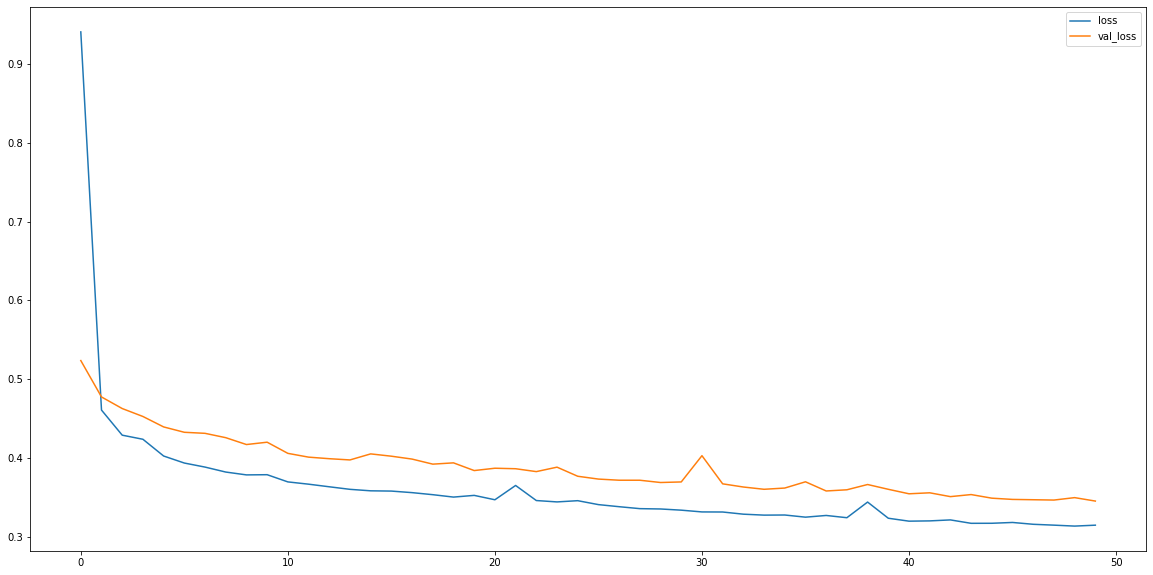

In [20]:
stats_df.plot(figsize=(20, 10))

In [21]:
mse_test = model.evaluate(X_test, y_test)

65/65 [==============================] - 0s 615us/step - loss: 0.3471


In [22]:
mse_test

0.3471132218837738

In [23]:
X_predict = X_test[:3]
y_hat = model.predict(X_predict)

In [24]:
type(y_hat), y_hat.shape

(numpy.ndarray, (3, 1))

In [25]:
for exp, actual in zip(y_test[:3].values, y_hat.ravel()):
    print(f"exp: {exp}, actual: {actual}")

exp: 0.477, actual: 0.44391435384750366
exp: 0.458, actual: 1.232308030128479
exp: 5.00001, actual: 4.085650444030762
